In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Import Libaries
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
# !pip install torchmetrics
from torchmetrics import Accuracy, Precision, F1Score
from pathlib import Path
from torch import optim
import torch.nn as nn

c:\Users\Bat_Sheva\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
dir_path = Path('Dataset')

In [6]:
##Transform Data for Trust Sake
from torchvision import transforms
transformer = torchvision.transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
])

In [7]:
##Load Image to Dataset 
datafolder = torchvision.datasets.ImageFolder(dir_path, transform = transformer)
len(datafolder)

2756

In [8]:
#Split Dataset
import torch.utils.data as data

# Random split
train_set_size = int(len(datafolder) * 0.8)
valid_set_size = len(datafolder) - train_set_size
train_set, valid_set = data.random_split(datafolder, [train_set_size, valid_set_size])

In [9]:
#length of data
len(train_set), len(valid_set)

(2204, 552)

In [10]:
classes = datafolder.classes
classes_len = len(classes)
classes_len, classes

(47,
 ['Adho Mukha Svanasana',
  'Adho Mukha Vrksasana',
  'Alanasana',
  'Anjaneyasana',
  'Ardha Chandrasana',
  'Ardha Matsyendrasana',
  'Ardha Navasana',
  'Ardha Pincha Mayurasana',
  'Ashta Chandrasana',
  'Baddha Konasana',
  'Bakasana',
  'Balasana',
  'Bitilasana',
  'Camatkarasana',
  'Dhanurasana',
  'Eka Pada Rajakapotasana',
  'Garudasana',
  'Halasana',
  'Hanumanasana',
  'Malasana',
  'Marjaryasana',
  'Navasana',
  'Padmasana',
  'Parsva Virabhadrasana',
  'Parsvottanasana',
  'Paschimottanasana',
  'Phalakasana',
  'Pincha Mayurasana',
  'Salamba Bhujangasana',
  'Salamba Sarvangasana',
  'Setu Bandha Sarvangasana',
  'Sivasana',
  'Supta Kapotasana',
  'Trikonasana',
  'Upavistha Konasana',
  'Urdhva Dhanurasana',
  'Urdhva Mukha Svsnssana',
  'Ustrasana',
  'Utkatasana',
  'Uttanasana',
  'Utthita Hasta Padangusthasana',
  'Utthita Parsvakonasana',
  'Vasisthasana',
  'Virabhadrasana One',
  'Virabhadrasana Three',
  'Virabhadrasana Two',
  'Vrksasana'])

In [11]:
# Load a Sample
img, label = train_set[0]

In [12]:
# Sample Details
img.shape, label

(torch.Size([3, 224, 224]), 37)

torch.Size([3, 224, 224])


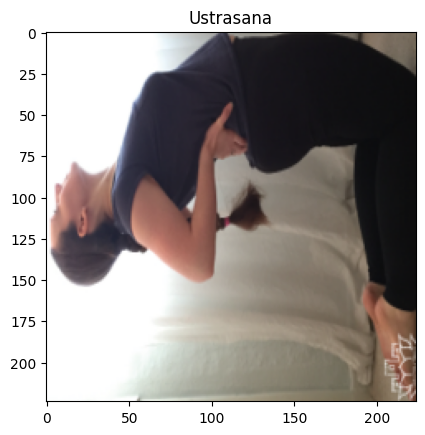

In [13]:
#View Sample Image
import matplotlib.pyplot as plt
img_sample = img.permute(2, 1, 0)
print(img.shape)
plt.imshow(img_sample)
plt.title(classes[label]);

In [14]:
import torchvision
from torchvision import models
import torchvision.models.efficientnet as e
import torchvision.models.resnet as r

In [15]:
#Load Weights for Training
WEIGHTS = r.resnet50(pretrained= True)
WEIGHTS2 = e.efficientnet_b0(pretrained= True)

c:\Users\Bat_Sheva\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Bat_Sheva\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Bat_Sheva\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Effic

In [16]:
#View Resnet Details
WEIGHTS.state_dict

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [17]:
##Freeze Model Params for Transfer Learning
for p in WEIGHTS.parameters():
    p.requires_grad = False

In [18]:
WEIGHTS.fc = nn.Linear(2048, classes_len)

In [19]:
#View Output Predictor
WEIGHTS.fc

Linear(in_features=2048, out_features=47, bias=True)

In [20]:
model = WEIGHTS
#Take model to device
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(dataset =train_set, batch_size =BATCH_SIZE, shuffle = True)
test_loader = DataLoader(dataset= valid_set, batch_size = BATCH_SIZE)

In [27]:
# Set up parameters
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.01)
accuracy_fn = Accuracy(task="MULTICLASS", num_classes=classes_len)
f1 = F1Score(task="MULTICLASS", num_classes=classes_len)


In [30]:
EPOCHS = 20

train_losses, train_acc = 0, 0

for epoch in range(EPOCHS):
  for batch, (X, y )in enumerate(train_loader):
    X = X.to(device)
    y = y.to(device)
    model.train()

    y_pred =model(X)
    loss = loss_fn(y_pred, y)
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
    train_losses += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if batch % 100 == 0:
      print(f'{train_losses} | {train_acc}')

  train_losses /= len(train_loader)
  train_acc /= len(train_loader)
  print(f' Train Loss: {train_losses:.4f} | Train Acc: {train_acc:.3f}')

model.eval()


0.16430312395095825 | 0.9375
 Train Loss: 0.4591 | Train Acc: 0.880
0.5160877108573914 | 1.8483436107635498
 Train Loss: 0.6372 | Train Acc: 0.876
1.2136812210083008 | 1.7198517322540283
 Train Loss: 0.8281 | Train Acc: 0.839
0.9868375658988953 | 1.7768017053604126
 Train Loss: 0.4693 | Train Acc: 0.897
0.5787241458892822 | 1.8660069704055786
 Train Loss: 0.5456 | Train Acc: 0.889
0.7455101013183594 | 1.8581770658493042
 Train Loss: 0.3952 | Train Acc: 0.916
0.6759670972824097 | 1.7906465530395508
 Train Loss: 0.5962 | Train Acc: 0.875
0.9604716300964355 | 1.7503302097320557
 Train Loss: 0.4591 | Train Acc: 0.914
1.0533826351165771 | 1.7578980922698975
 Train Loss: 0.6272 | Train Acc: 0.898
0.8052922487258911 | 1.835065245628357
 Train Loss: 0.4394 | Train Acc: 0.901
0.7811558246612549 | 1.744633436203003
 Train Loss: 0.6193 | Train Acc: 0.885
0.6771461367607117 | 1.8853389024734497
 Train Loss: 0.5650 | Train Acc: 0.899
1.1782498359680176 | 1.7740240097045898
 Train Loss: 0.4667 | Tra

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [31]:
test_loss, test_acc, test_f1 = 0, 0, 0
with torch.inference_mode():
  for Xt, yt in test_loader:
        Xt = Xt.to(device)
        yt= yt.to(device)
        test_pred = model(Xt)
        t_loss = loss_fn(test_pred, yt)
        test_loss += t_loss
        test_acc += accuracy_fn(test_pred.argmax(dim=1), yt)
        test_f1 += f1(test_pred.argmax(dim=1), yt)
  test_loss /= len(test_loader)
  test_acc /= len(test_loader)
  test_f1 /= len(test_loader)
  
print(f' Test Loss {test_loss:.4f} | Test Acc: {test_acc:.2f} | F1Score: {test_f1}  ')

 Test Loss 4.2477 | Test Acc: 0.59 | F1Score: 0.59375  


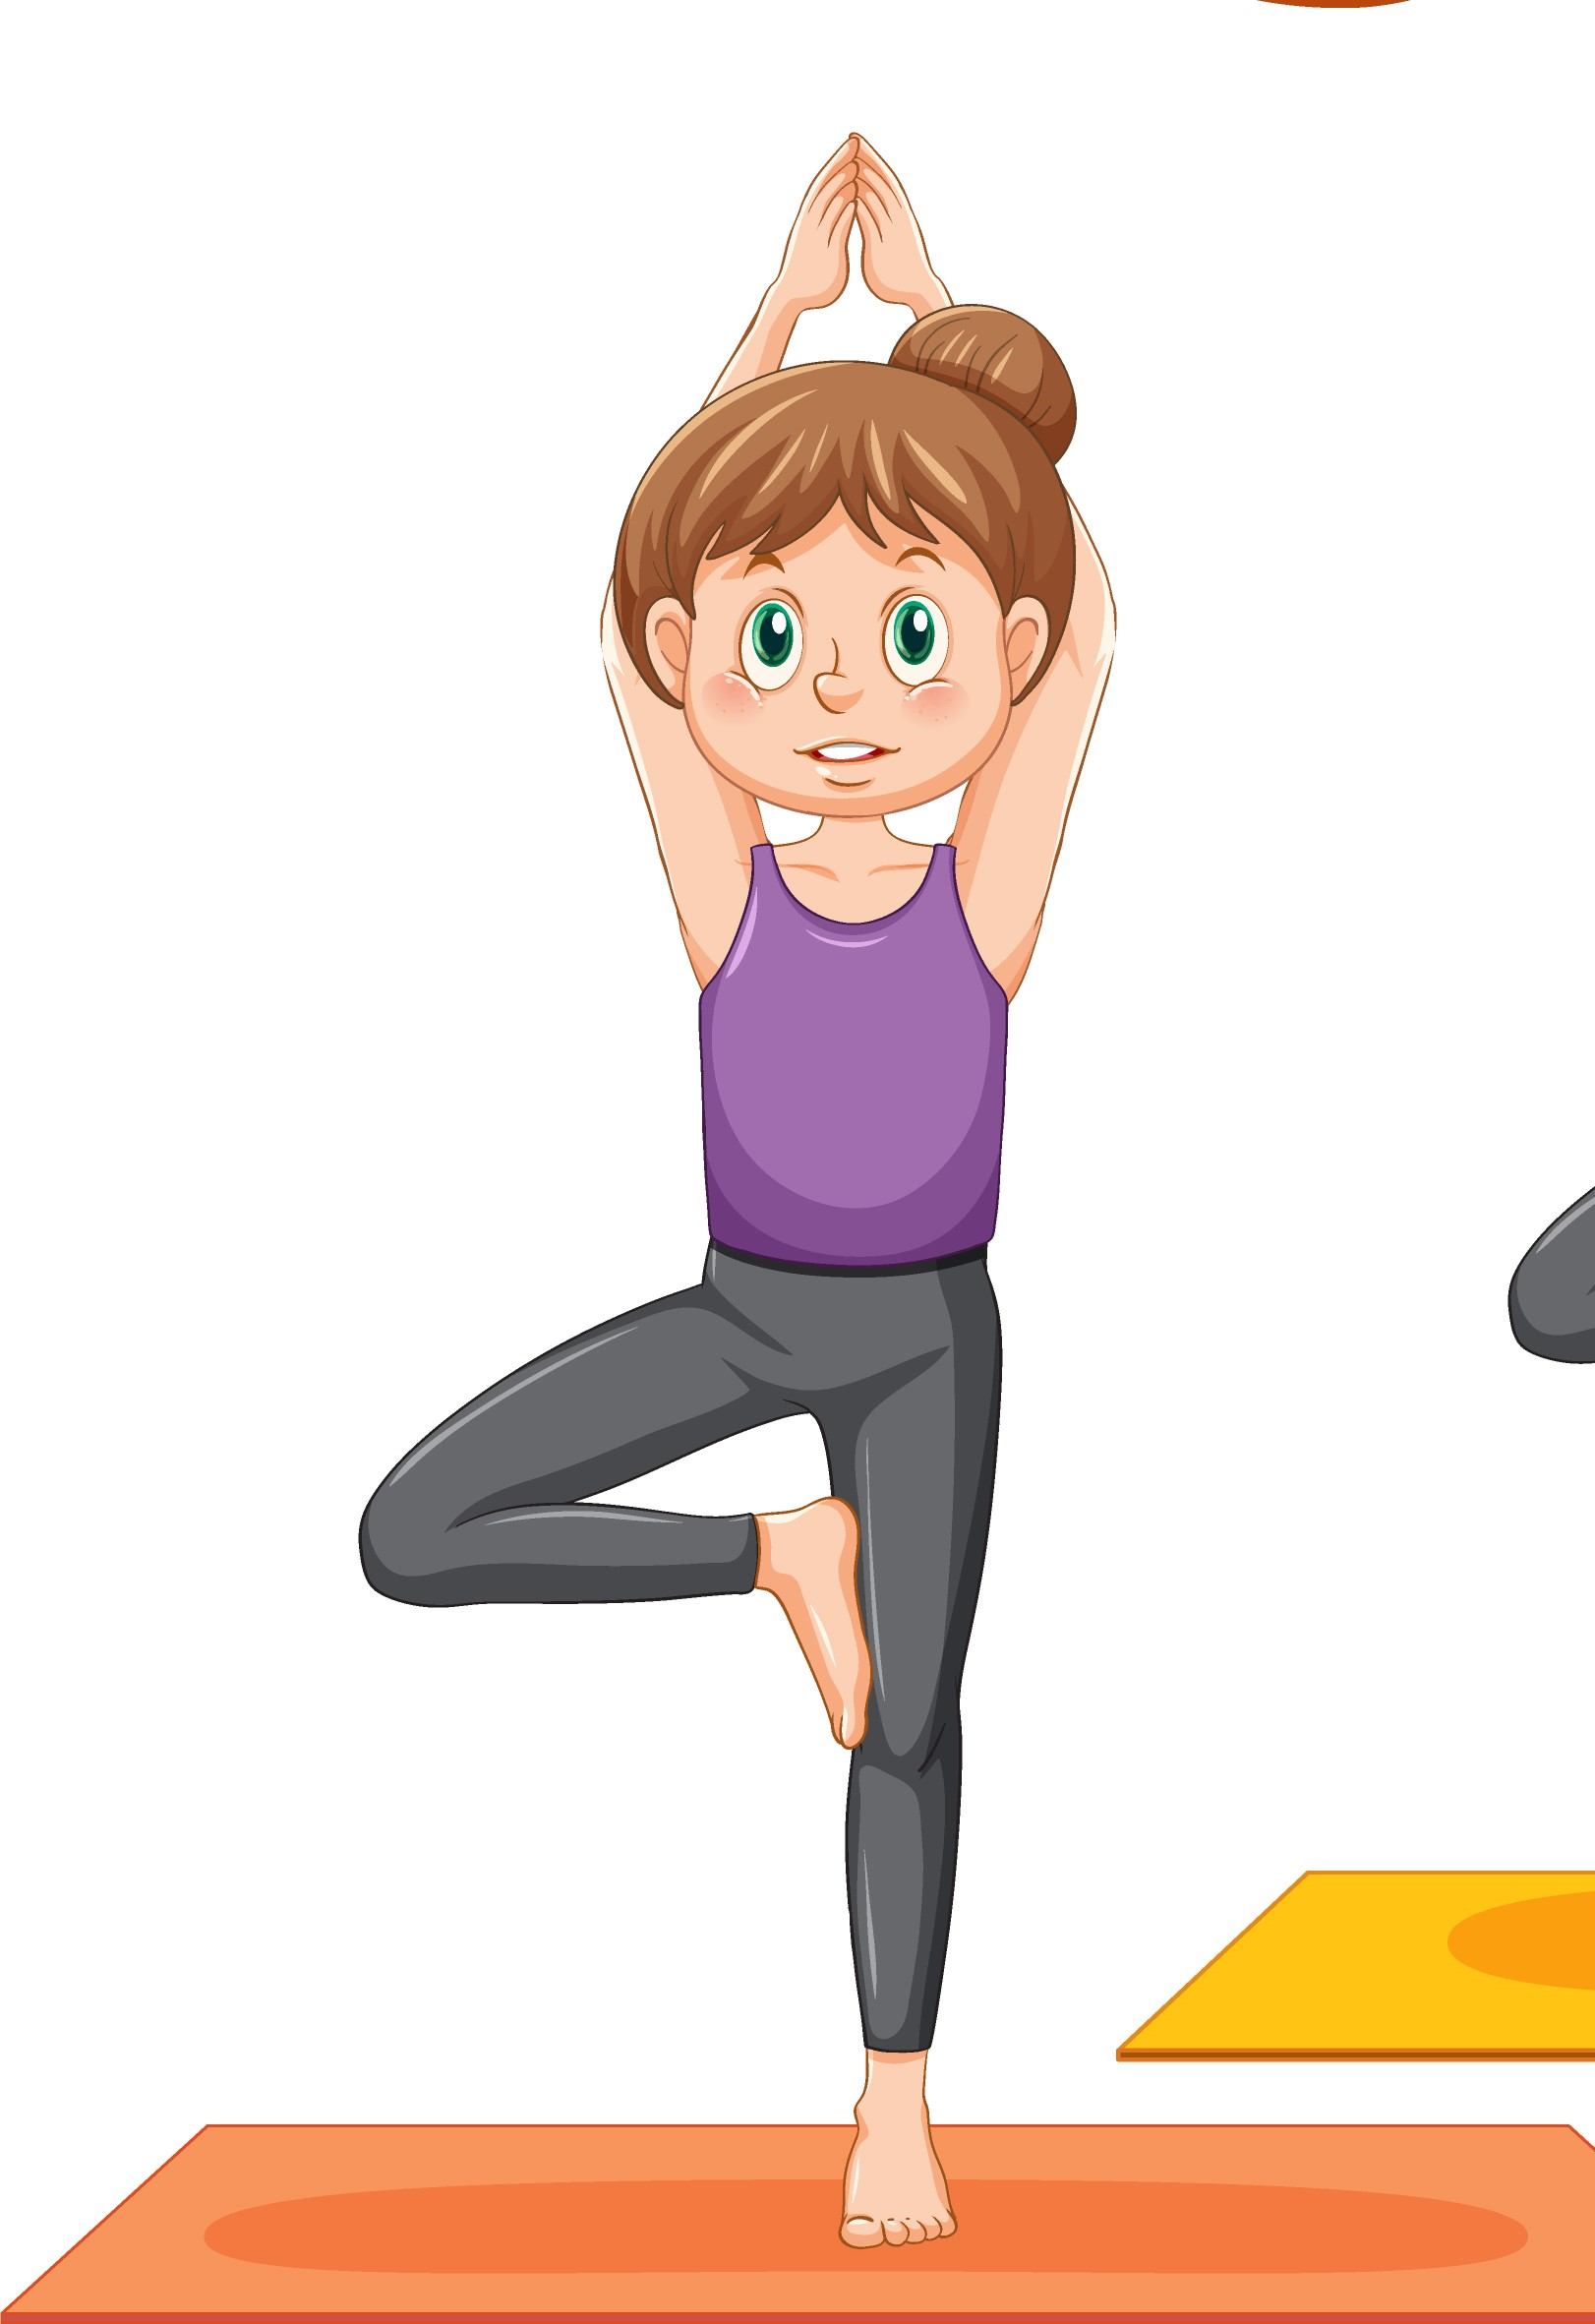

In [48]:
load_path = rf"C:\Users\Bat_Sheva\OneDrive\שולחן העבודה\yoga\d.jpg"
from PIL import Image
img = Image.open(load_path)
img

In [49]:
transformed_img = transformer(img)

In [50]:
transformed_img = transformed_img.unsqueeze(dim=0)
transformed_img.shape

torch.Size([1, 3, 224, 224])

In [51]:
transformed_img.to(device)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [52]:
transformed_img = transformed_img.to(device)

In [53]:
transformed_img.device

device(type='cpu')

In [54]:
with torch.inference_mode():
    transformed_img.to(device)
    output = model(transformed_img)

In [55]:
outputp = torch.argmax(output).detach()
outputp =outputp.item()

In [56]:
Predicted_class = classes[outputp]
print(f'Predicted Class is: {Predicted_class} ')

Predicted Class is: Ustrasana 
